In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

# Gerekli kütüphaneleri yükleme
# NumPy ve pandas veri işleme için kullanılır.
# Matplotlib ve Seaborn görselleştirme için kullanılır.
# Keras, RNN ve LSTM modellerini oluşturmak için kullanılır.


In [2]:
# IMDB veri setini yükleme (En çok kullanılan 10,000 kelime)
max_features = 10000  # Kelime sayısını sınırlamak için maksimum kelime sayısı
maxlen = 100  # İncelemeleri 100 kelimeye kadar kısalt

# Keras'ın sağladığı IMDB veri setini yükler (veri seti önceden işlenmiştir)
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

# Veriyi padding işlemi ile sabit uzunlukta olacak şekilde ayarlama
x_train = pad_sequences(x_train, maxlen=maxlen)  # Eğitim verisi için padding işlemi
x_test = pad_sequences(x_test, maxlen=maxlen)  # Test verisi için padding işlemi

# IMDB veri setini yüklüyoruz. İncelemeler, kelime indeksleri olarak temsil edilir.
# 'num_words' parametresi, en sık kullanılan 10,000 kelimeyi kullanmak için belirler.
# 'pad_sequences' kullanarak her incelemeyi sabit uzunluğa (100 kelime) kadar kesiyoruz veya dolduruyoruz.


In [3]:
#!pip install --upgrade tensorflow keras
# RNN Modeli oluşturma
model_rnn = Sequential()  # Ardışık bir model oluştur
model_rnn.add(Embedding(input_dim=max_features, output_dim=128, input_length=maxlen))
# Embedding katmanı: Her kelimeyi 128 boyutlu bir vektöre dönüştür
model_rnn.add(SimpleRNN(128, return_sequences=False))  # Basit RNN katmanı, 128 nöron ile
model_rnn.add(Dropout(0.5))  # Overfitting'i azaltmak için Dropout katmanı
model_rnn.add(Dense(1, activation='sigmoid'))  # Çıktı katmanı, sigmoid aktivasyon ile



# Modelin derlenmesi
model_rnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


# Modelin eğitim sırasında kaybı izlemek için erken durdurma
early_stopping_rnn = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

# RNN Model Eğitimi
history_rnn = model_rnn.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.2, callbacks=[early_stopping_rnn])
print(model_rnn.summary())

# RNN Modeli:
# - Embedding katmanı: Kelimeleri 128 boyutlu vektörlere dönüştürür.
# - SimpleRNN katmanı: 128 nöronlu bir RNN katmanı.
# - Dropout katmanı: %50 oranında nöronları rastgele devre dışı bırakarak overfitting'i azaltır.
# - Dense katmanı: Çıktı katmanı, sigmoid aktivasyon fonksiyonu ile sınıflandırma yapar.
# 'optimizer': Adam optimizasyon algoritması, 'loss': binary_crossentropy, iki sınıflı sınıflandırma kaybı fonksiyonu.


Epoch 1/10


C:\Users\MKOTAN\anaconda3\envs\env_nlp\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - accuracy: 0.5259 - loss: 0.7005 - val_accuracy: 0.7780 - val_loss: 0.4743
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.7991 - loss: 0.4375 - val_accuracy: 0.7882 - val_loss: 0.4602
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.8900 - loss: 0.2751 - val_accuracy: 0.7984 - val_loss: 0.4994
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.9513 - loss: 0.1399 - val_accuracy: 0.7946 - val_loss: 0.5770


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 100, 128)       │     1,280,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn (SimpleRNN)          │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,939,077 (15.03 MB)

 Trainable params: 1,313,025 (5.01 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,626,052 (10.02 MB)

None


In [4]:
# LSTM Modeli oluşturma
model_lstm = Sequential()  # Ardışık bir model oluştur
model_lstm.add(Embedding(input_dim=max_features, output_dim=128, input_length=maxlen))
# Embedding katmanı: Her kelimeyi 128 boyutlu bir vektöre dönüştür
model_lstm.add(LSTM(128, return_sequences=False))  # LSTM katmanı, 128 nöron ile
model_lstm.add(Dropout(0.5))  # Overfitting'i azaltmak için Dropout katmanı
model_lstm.add(Dense(1, activation='sigmoid'))  # Çıktı katmanı, sigmoid aktivasyon ile

# Modelin derlenmesi
model_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


# Modelin eğitim sırasında kaybı izlemek için erken durdurma
early_stopping_lstm = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

# LSTM Model Eğitimi
history_lstm = model_lstm.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.2, callbacks=[early_stopping_lstm])
print(model_lstm.summary())

# LSTM Modeli:
# - Embedding katmanı: Kelimeleri 128 boyutlu vektörlere dönüştürür.
# - LSTM katmanı: 128 nöronlu bir LSTM katmanı.
# - Dropout katmanı: %50 oranında nöronları rastgele devre dışı bırakarak overfitting'i azaltır.
# - Dense katmanı: Çıktı katmanı, sigmoid aktivasyon fonksiyonu ile sınıflandırma yapar.
# 'optimizer': Adam optimizasyon algoritması, 'loss': binary_crossentropy, iki sınıflı sınıflandırma kaybı fonksiyonu.


Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 17s 48ms/step - accuracy: 0.7106 - loss: 0.5316 - val_accuracy: 0.8302 - val_loss: 0.4028
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 15s 47ms/step - accuracy: 0.8921 - loss: 0.2786 - val_accuracy: 0.8434 - val_loss: 0.3697
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 15s 47ms/step - accuracy: 0.9266 - loss: 0.1944 - val_accuracy: 0.8414 - val_loss: 0.3896
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 15s 48ms/step - accuracy: 0.9522 - loss: 0.1372 - val_accuracy: 0.8346 - val_loss: 0.4339


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (None, 100, 128)       │     1,280,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 128)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,235,141 (16.16 MB)

 Trainable params: 1,411,713 (5.39 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,823,428 (10.77 MB)

None


In [5]:
# RNN Model Değerlendirmesi
loss_rnn, accuracy_rnn = model_rnn.evaluate(x_test, y_test)
print(f'Test Loss (RNN): {loss_rnn}')
print(f'Test Accuracy (RNN): {accuracy_rnn}')
y_pred_rnn = (model_rnn.predict(x_test) > 0.5).astype("int32")
cm_rnn = confusion_matrix(y_test, y_pred_rnn)
print(f'Confusion Matrix:\n{cm_rnn}')

# precision, recall, F1 score
precision_rnn = precision_score(y_test, y_pred_rnn)
recall_rnn = recall_score(y_test, y_pred_rnn)
f1_rnn = f1_score(y_test, y_pred_rnn)


print(f'Precision (RNN): {precision_rnn}')
print(f'Recall (RNN): {recall_rnn}')
print(f'F1 Score (RNN): {f1_rnn}')


# LSTM Model Değerlendirmesi
loss_lstm, accuracy_lstm = model_lstm.evaluate(x_test, y_test)
print(f'Test Loss (LSTM): {loss_lstm}')
print(f'Test Accuracy (LSTM): {accuracy_lstm}')
y_pred_lstm = (model_lstm.predict(x_test) > 0.5).astype("int32")
cm_lstm = confusion_matrix(y_test, y_pred_lstm)

print(f'Confusion Matrix (LSTM):\n{cm_lstm}')

# precision, recall,  F1 score 
precision_lstm = precision_score(y_test, y_pred_lstm)
recall_lstm = recall_score(y_test, y_pred_lstm)
f1_lstm = f1_score(y_test, y_pred_lstm)


print(f'Precision (LSTM): {precision_lstm}')
print(f'Recall (LSTM): {recall_lstm}')
print(f'F1 Score (LSTM): {f1_lstm}')

# Modellerin performansını test verisi üzerinde değerlendirir ve doğruluk ile kayıp metriklerini elde eder.
# Ayrıca tahminler yapılarak karışıklık matrisi oluşturulur.


782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7988 - loss: 0.4523
Test Loss (RNN): 0.4457636773586273
Test Accuracy (RNN): 0.8033599853515625
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step
Confusion Matrix:
[[ 9312  3188]
 [ 1728 10772]]
Precision (RNN): 0.7716332378223496
Recall (RNN): 0.86176
F1 Score (RNN): 0.8142101284958427
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.8413 - loss: 0.3709
Test Loss (LSTM): 0.3729342222213745
Test Accuracy (LSTM): 0.8416799902915955
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step
Confusion Matrix (LSTM):
[[10897  1603]
 [ 2355 10145]]
Precision (LSTM): 0.863551242764726
Recall (LSTM): 0.8116
F1 Score (LSTM): 0.8367700428901352


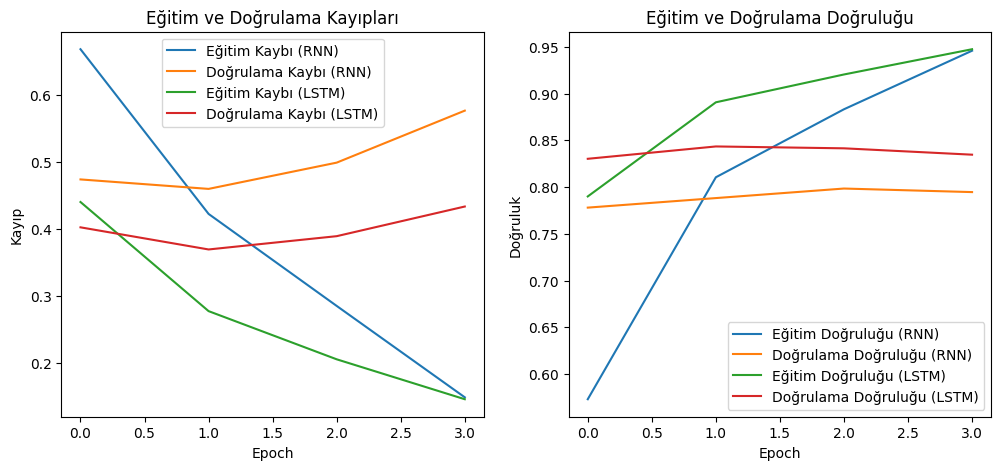

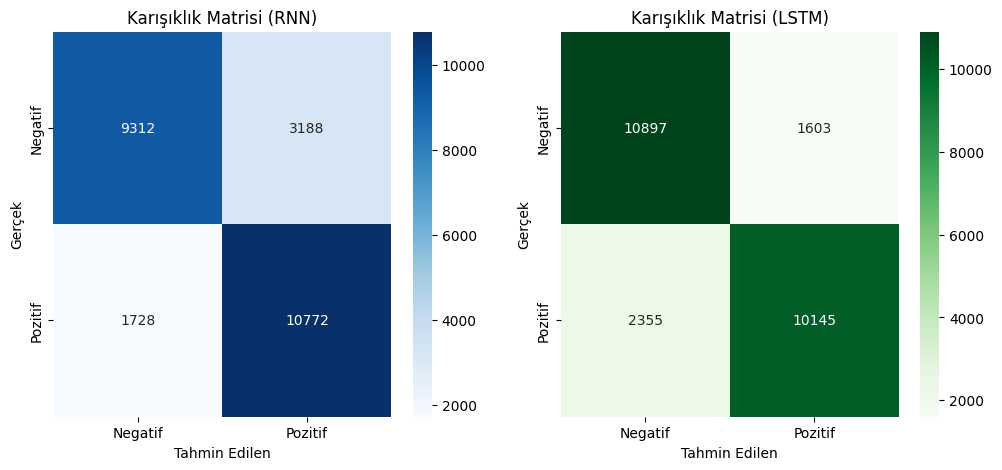

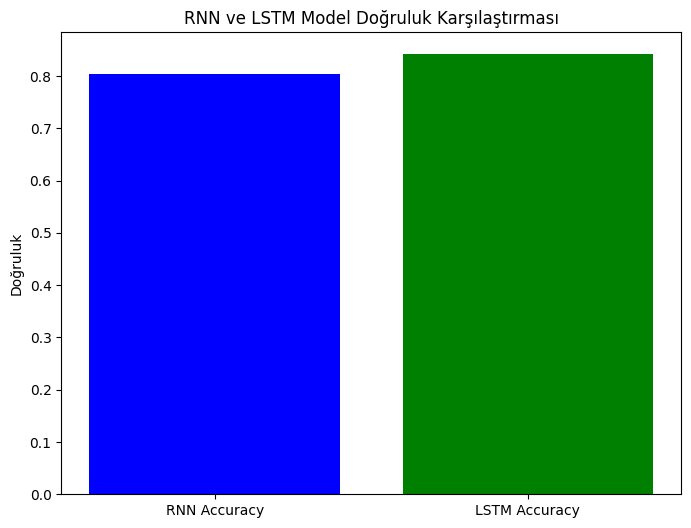

In [6]:
# Eğitim ve Doğrulama Kayıplarının Grafiği
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history_rnn.history['loss'], label='Eğitim Kaybı (RNN)')
plt.plot(history_rnn.history['val_loss'], label='Doğrulama Kaybı (RNN)')
plt.plot(history_lstm.history['loss'], label='Eğitim Kaybı (LSTM)')
plt.plot(history_lstm.history['val_loss'], label='Doğrulama Kaybı (LSTM)')
plt.title('Eğitim ve Doğrulama Kayıpları')
plt.xlabel('Epoch')
plt.ylabel('Kayıp')
plt.legend()

# Eğitim ve Doğrulama Doğruluğunun Grafiği
plt.subplot(1, 2, 2)
plt.plot(history_rnn.history['accuracy'], label='Eğitim Doğruluğu (RNN)')
plt.plot(history_rnn.history['val_accuracy'], label='Doğrulama Doğruluğu (RNN)')
plt.plot(history_lstm.history['accuracy'], label='Eğitim Doğruluğu (LSTM)')
plt.plot(history_lstm.history['val_accuracy'], label='Doğrulama Doğruluğu (LSTM)')
plt.title('Eğitim ve Doğrulama Doğruluğu')
plt.xlabel('Epoch')
plt.ylabel('Doğruluk')
plt.legend()
plt.show()

# Karışıklık Matrisi Görselleştirme
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.heatmap(cm_rnn, annot=True, fmt='d', cmap='Blues', xticklabels=['Negatif', 'Pozitif'], yticklabels=['Negatif', 'Pozitif'])
plt.xlabel('Tahmin Edilen')
plt.ylabel('Gerçek')
plt.title('Karışıklık Matrisi (RNN)')

plt.subplot(1, 2, 2)
sns.heatmap(cm_lstm, annot=True, fmt='d', cmap='Greens', xticklabels=['Negatif', 'Pozitif'], yticklabels=['Negatif', 'Pozitif'])
plt.xlabel('Tahmin Edilen')
plt.ylabel('Gerçek')
plt.title('Karışıklık Matrisi (LSTM)')
plt.show()

# Doğruluk Karşılaştırması Grafiği
plt.figure(figsize=(8, 6))
plt.bar(['RNN Accuracy', 'LSTM Accuracy'], [accuracy_rnn, accuracy_lstm], color=['blue', 'green'])
plt.title('RNN ve LSTM Model Doğruluk Karşılaştırması')
plt.ylabel('Doğruluk')
plt.show()

# Modellerin eğitim ve doğrulama kayıplarını ve doğruluklarını karşılaştırmak için grafikler oluşturur.
# Karışıklık matrisleri ve doğruluk karşılaştırma grafiği ile performansı görselleştirir.


In [ ]:
import pandas as pd

# Veri setini yükleme
data = pd.read_csv('path/to/your/dataset.csv')

# Metin ve etiket sütunlarını ayırma
texts = data['text_column_name'].values
labels = data['label_column_name'].values
